In [1]:
%matplotlib inline

import pandas as pd
import intake
catalog = intake.cat.access_nri
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cftime
from collections import OrderedDict

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [3]:
client=Client("tcp://10.6.43.39:8786")
client

Client Scheduler: tcp://127.0.0.1:42267 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [5]:
def global_scalar(variable):
    for ekey in exptdata.exptdict.keys():
        expt = exptdata.exptdict[ekey]['expt']
        offset = exptdata.exptdict[ekey]['offset']
        cat_subset = catalog[expt]
        var_search = cat_subset.search(variable=variable)
        darray = var_search.to_dask()
        darray = darray[variable]
        if offset:# shift time axis of drray by 'offset'
            darray = darray.assign_coords(time = darray.time - xr.coding.cftime_offsets.to_offset(offset))
        annual_average = darray.resample(time='A').mean()
        annual_average.plot(label=exptdata.exptdict[ekey]['desc'])

    plt.gca().autoscale()

In [6]:
def add_cycles():
    cycle_dates = [1778, 1838, 1898]
    ylims=plt.gca().get_ylim()
    for cd in cycle_dates:
        plt.plot([cftime.datetime(cd,1,1),cftime.datetime(cd,1,1)],ylims,'k--',linewidth=0.8)
    plt.gca().set_ylim(ylims)

In [7]:
temp=np.loadtxt('aravg.ann.ocean.90S.90N.v4.0.1.201901.asc')
sst = temp[:,1] + 18
sst_year = xr.cftime_range(start='1880-07-01', periods=sst.size, freq="A", calendar="julian")
sst_year

CFTimeIndex([1880-12-31 00:00:00, 1881-12-31 00:00:00, 1882-12-31 00:00:00,
             1883-12-31 00:00:00, 1884-12-31 00:00:00, 1885-12-31 00:00:00,
             1886-12-31 00:00:00, 1887-12-31 00:00:00, 1888-12-31 00:00:00,
             1889-12-31 00:00:00,
             ...
             2010-12-31 00:00:00, 2011-12-31 00:00:00, 2012-12-31 00:00:00,
             2013-12-31 00:00:00, 2014-12-31 00:00:00, 2015-12-31 00:00:00,
             2016-12-31 00:00:00, 2017-12-31 00:00:00, 2018-12-31 00:00:00,
             2019-12-31 00:00:00],
            dtype='object', length=140, calendar='julian')

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


(-15340.0, 6574.0)

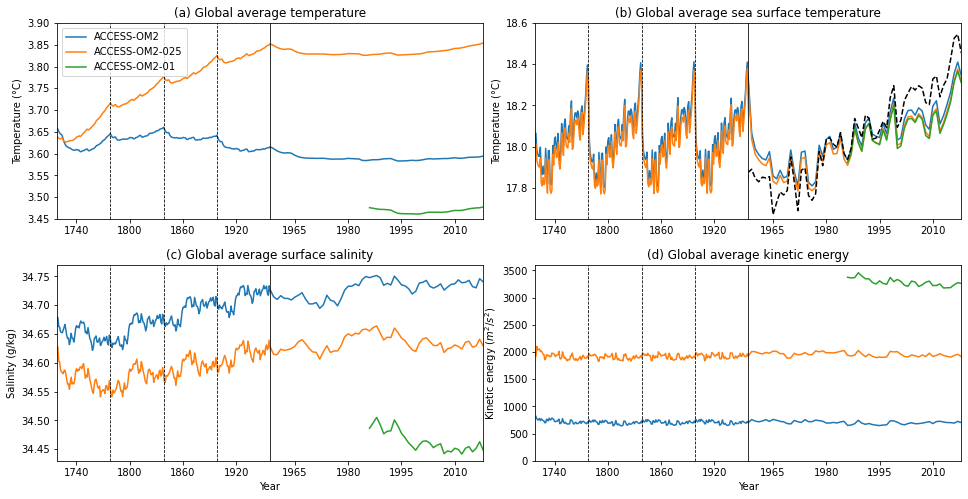

In [8]:
plt.figure(figsize=(16,8))

#############
## FIRST PLOT
ax = plt.axes([0.125, 0.545,0.185, 0.34])
global_scalar('temp_global_ave')
plt.legend()
ax.set_title('')
plt.xlabel('')
plt.ylabel('Temperature (°C)')
ax.set_ylim([3.45, 3.9])
ax.set_xlim([cftime.datetime(1718,1,1),cftime.datetime(1957,12,31)])
#ax.set_xticks([cftime.datetime(1730,1,1), cftime.datetime(1740,1,1), cftime.datetime(1750,1,1), cftime.datetime(1770,1,1), 
#               cftime.datetime(1780,1,1), cftime.datetime(1790,1,1), cftime.datetime(1810,1,1), cftime.datetime(1820,1,1), 
#               cftime.datetime(1830,1,1), cftime.datetime(1850,1,1), cftime.datetime(1860,1,1), cftime.datetime(1870,1,1),
#               cftime.datetime(1890,1,1), cftime.datetime(1900,1,1), cftime.datetime(1910,1,1), cftime.datetime(1930,1,1),
#               cftime.datetime(1940,1,1), cftime.datetime(1950,1,1)], minor=True)
add_cycles()

ax = plt.axes([0.31, 0.545,0.185, 0.34])
ax.set_yticks([])
global_scalar('temp_global_ave')
plt.xlabel('')
plt.ylabel('')
ax.set_title('(a) Global average temperature',position=(0.0,1.0))
ax.set_ylim([3.45, 3.9])
ax.set_xlim([cftime.datetime(1958,1,1),cftime.datetime(2017,12,31)])

##############
## SECOND PLOT
ax = plt.axes([0.54, 0.545,0.185, 0.34])
global_scalar('temp_surface_ave')
ax.set_title('')
plt.xlabel('')
plt.ylabel('Temperature (°C)')
ax.set_ylim([17.65, 18.6])
ax.set_xlim([cftime.datetime(1718,1,1),cftime.datetime(1957,12,31)])
#ax.set_xticks([cftime.datetime(1730,1,1), cftime.datetime(1740,1,1), cftime.datetime(1750,1,1), cftime.datetime(1770,1,1), 
#               cftime.datetime(1780,1,1), cftime.datetime(1790,1,1), cftime.datetime(1810,1,1), cftime.datetime(1820,1,1), 
#               cftime.datetime(1830,1,1), cftime.datetime(1850,1,1), cftime.datetime(1860,1,1), cftime.datetime(1870,1,1),
#               cftime.datetime(1890,1,1), cftime.datetime(1900,1,1), cftime.datetime(1910,1,1), cftime.datetime(1930,1,1),
#               cftime.datetime(1940,1,1), cftime.datetime(1950,1,1)], minor=True)
add_cycles()

ax = plt.axes([0.725, 0.545,0.185, 0.34])
ax.set_yticks([])
global_scalar('temp_surface_ave')
plt.xlabel('')
plt.ylabel('')
ax.set_title('(b) Global average sea surface temperature',position=(0.0,1.0))
ax.set_xlim([cftime.datetime(1958,1,1),cftime.datetime(2017,12,31)])
## Add Obs:
ax.plot(sst_year,sst,'k--')
ax.set_ylim([17.65, 18.6])


#############
## THIRD PLOT
ax = plt.axes([0.125, 0.125,0.185, 0.34])
global_scalar('salt_surface_ave')
ax.set_title('')
plt.xlabel('')
plt.ylabel('Salinity (g/kg)')
ax.set_ylim([34.43, 34.77])
ax.set_xlim([cftime.datetime(1718,1,1),cftime.datetime(1957,12,31)])
#ax.set_xticks([cftime.datetime(1730,1,1), cftime.datetime(1740,1,1), cftime.datetime(1750,1,1), cftime.datetime(1770,1,1), 
#               cftime.datetime(1780,1,1), cftime.datetime(1790,1,1), cftime.datetime(1810,1,1), cftime.datetime(1820,1,1), 
#               cftime.datetime(1830,1,1), cftime.datetime(1850,1,1), cftime.datetime(1860,1,1), cftime.datetime(1870,1,1),
#               cftime.datetime(1890,1,1), cftime.datetime(1900,1,1), cftime.datetime(1910,1,1), cftime.datetime(1930,1,1),
#               cftime.datetime(1940,1,1), cftime.datetime(1950,1,1)], minor=True)
add_cycles()

ax = plt.axes([0.31, 0.125,0.185, 0.34])
ax.set_yticks([])
global_scalar('salt_surface_ave')
plt.ylabel('')
ax.set_title('(c) Global average surface salinity',position=(0.0,1.0))
ax.set_xlabel('Year',position=(0.0,1.0))
ax.set_ylim([34.43, 34.77])
ax.set_xlim([cftime.datetime(1958,1,1),cftime.datetime(2017,12,31)])

#############
## FOURTH PLOT
ax = plt.axes([0.54, 0.125,0.185, 0.34])
global_scalar('ke_tot')
ax.set_title('')
plt.xlabel('')
plt.ylabel('Kinetic energy ($m^2/s^2$)')
ax.set_ylim([0, 3600])
ax.set_xlim([cftime.datetime(1718,1,1),cftime.datetime(1957,12,31)])
#ax.set_xticks([cftime.datetime(1730,1,1), cftime.datetime(1740,1,1), cftime.datetime(1750,1,1), cftime.datetime(1770,1,1), 
#               cftime.datetime(1780,1,1), cftime.datetime(1790,1,1), cftime.datetime(1810,1,1), cftime.datetime(1820,1,1), 
#               cftime.datetime(1830,1,1), cftime.datetime(1850,1,1), cftime.datetime(1860,1,1), cftime.datetime(1870,1,1),
#               cftime.datetime(1890,1,1), cftime.datetime(1900,1,1), cftime.datetime(1910,1,1), cftime.datetime(1930,1,1),
#               cftime.datetime(1940,1,1), cftime.datetime(1950,1,1)], minor=True)
add_cycles()

ax = plt.axes([0.725, 0.125,0.185, 0.34])
ax.set_yticks([])
global_scalar('ke_tot')
plt.ylabel('')
ax.set_title('(d) Global average kinetic energy',position=(0.0,1.0))
ax.set_xlabel('Year',position=(0.0,1.0))
ax.set_ylim([0, 3600])
ax.set_xlim([cftime.datetime(1958,1,1),cftime.datetime(2017,12,31)])